##0.Опишем задачу

Датасет содержит набор данных HR о сотрудниках компании, продвигающихся по службе. Для каждого сотрудника приведена следующая информация:


*   id - его идентификатор
*   department - отдел, в котором он работает

*   region - регион, в котором он работает

*   education - ступень образования
*   gender - пол


*   recruitment_channel - канал найма


*   no_of_trainings - количество пройденных тренингов
*   age - возраст


*   previous_year rating - рейтинг за прошлый год

*   length_of_service - стаж работы
*   KPIs_met > 80 % - превышают ли ключевые показатели эффективности 80 % ?


*   awards_won ? - выигрывал ли награды?


*   avg_training_score - средний балл на тренингах
*  is_promoted - был ли сотрудник повышен в должности?

Задача: Предсказываем был ли сотрудник повышен в должности?














##1.  Считываем данные



In [1]:
import sys
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
url = "https://raw.githubusercontent.com/Dmitry145/ML/main/train.csv"
data = pd.read_csv(url)

In [3]:
import io 
data = pd.read_csv(io.BytesIO(upload['train.csv']))

NameError: ignored

In [4]:
data


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


##2.Визуализируем данные и вычисляем основные характеристики

Характеристики числовых признаков

In [6]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Характеристики категориальных признаков

In [7]:
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Визуализируем некоторые данные:

1) Возраст работников:

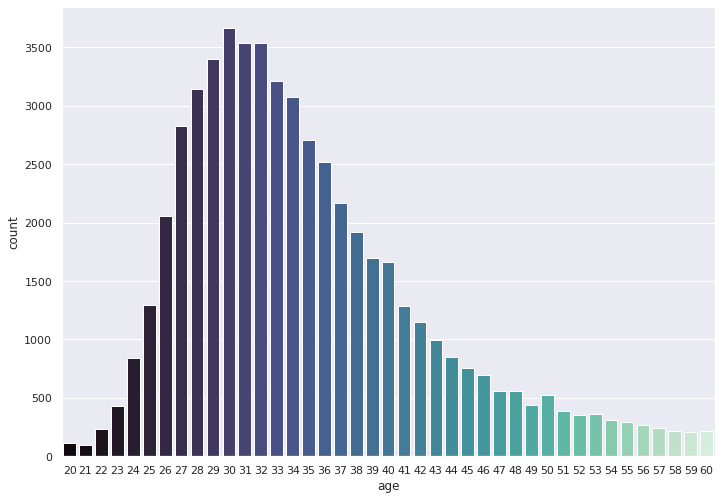

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='age', data=data, palette ="mako")

pass

2) Стаж работы:

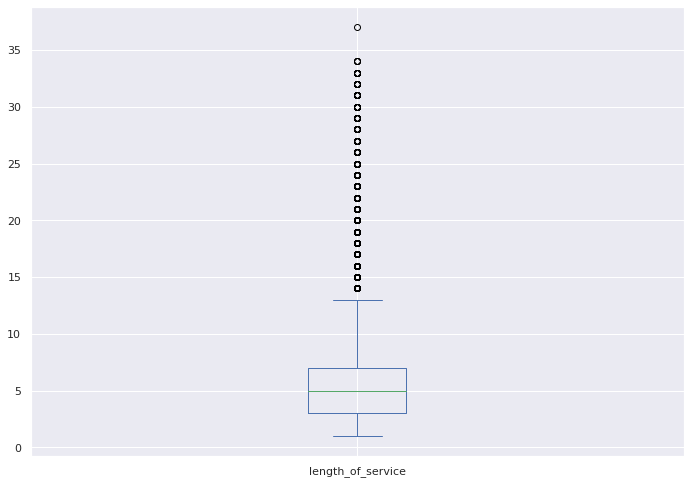

In [9]:
data['length_of_service'].plot(kind='box')
pass

3) Пол работников:

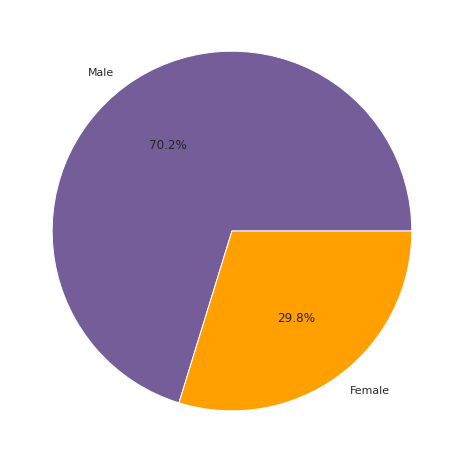

In [10]:
plt.pie(data['gender'].value_counts(), autopct='%1.1f%%', pctdistance = 0.6, labels = ['Male', 'Female'], colors = [(117/255,93/255,154/255), (255/255,160/255,0/255)])
pass

Матрица корреляции

In [11]:
data.corr()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


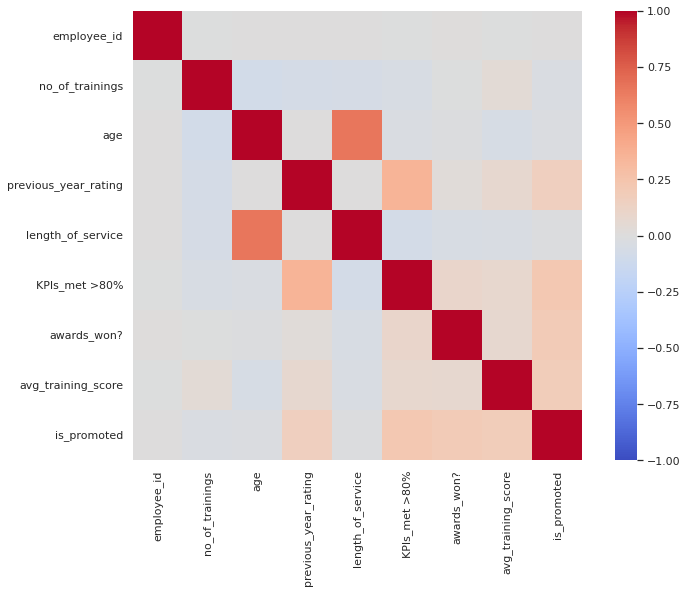

In [12]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Видим, что большинство признаков слабо коррелирует, за исключением, быть может lengt_of_service и age

##3.Обработаем пропущенные значения

Определим их количество и то, в каких стобцах они находятся

In [13]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Заменим пропущенные значения для числового признака медианой:

In [14]:
feat = ['previous_year_rating']
data[feat].median(axis = 0)

previous_year_rating    3.0
dtype: float64

In [15]:
data[feat] = data[feat].fillna(data[feat].median(axis = 0), axis=0)

In [16]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Заменим пропущенные значения для категориального признака модой:

In [17]:
data['education'].fillna(data['education'].mode().iloc[0], inplace=True)

In [18]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

##4.Обработаем категориальные признаки

Определим, какие из катигориальных признаков можно отнести к бинарным, а какие нет:

In [19]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
numerical_columns.remove('is_promoted')
numerical_columns.remove('awards_won?')
numerical_columns.remove('KPIs_met >80%')
binar_col =  [c for c in data.columns if c == 'is_promoted' or c == 'awards_won?' or c == 'KPIs_met >80%']
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['gender'] ['department', 'region', 'education', 'recruitment_channel']


In [20]:
data['gender'].unique()

array(['f', 'm'], dtype=object)

In [21]:
data.at[data['gender'] == 'm', 'gender'] = 0
data.at[data['gender'] == 'f', 'gender'] = 1
data['gender'].describe()

count     54808
unique        2
top           0
freq      38496
Name: gender, dtype: int64

In [22]:
data['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [23]:
data[nonbinary_columns]

,department,region,education,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,sourcing
1,Operations,region_22,Bachelor's,other
2,Sales & Marketing,region_19,Bachelor's,sourcing
3,Sales & Marketing,region_23,Bachelor's,other
4,Technology,region_26,Bachelor's,other
...,...,...,...,...
54803,Technology,region_14,Bachelor's,sourcing
54804,Operations,region_27,Master's & above,other
54805,Analytics,region_1,Bachelor's,other
54806,Sales & Marketing,region_9,Bachelor's,sourcing


In [24]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'region_region_4',
       'region_region_5', 'region_region_6', 'region_region_7',
       'region_region_8', 'region_region_9', 'education_Bach

In [25]:
len(data_nonbinary.columns)

49

##5.Проведем нормализацию

In [26]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,63.386750
std,22586.581449,0.609264,7.660169,1.214770,4.265094,13.371559
min,1.000000,1.000000,20.000000,1.000000,1.000000,39.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,51.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,60.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,76.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,99.000000


In [27]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [28]:
data_numerical.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04
mean,9.878732e-17,1.970561e-17,-3.720730e-16,-2.207806e-16,4.816206e-17,-2.852127e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.735315e+00,-4.152724e-01,-1.932583e+00,-1.897052e+00,-1.140775e+00,-1.823778e+00
25%,-8.644992e-01,-4.152724e-01,-7.576746e-01,-2.506492e-01,-6.718521e-01,-9.263504e-01
50%,1.313584e-03,-4.152724e-01,-2.354929e-01,-2.506492e-01,-2.029292e-01,-2.532801e-01
75%,8.648794e-01,-4.152724e-01,5.477796e-01,5.725520e-01,2.659936e-01,9.432894e-01
max,1.731212e+00,1.435665e+01,3.289233e+00,1.395753e+00,7.299836e+00,2.663358e+00


In [29]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns], data[binar_col]), axis = 1)
print(data.shape)

(54808, 59)


In [30]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,KPIs_met >80%,awards_won?,is_promoted
count,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,54808.000000,54808.000000,54808.000000,54808.000000,...,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,9.878732e-17,1.970561e-17,-3.720730e-16,-2.207806e-16,4.816206e-17,-2.852127e-17,0.097650,0.046271,0.044118,0.018957,...,0.007663,0.712998,0.014688,0.272314,0.555503,0.020836,0.423661,0.351974,0.023172,0.085170
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.296844,0.210072,0.205358,0.136375,...,0.087204,0.452367,0.120300,0.445155,0.496914,0.142838,0.494142,0.477590,0.150450,0.279137
min,-1.735315e+00,-4.152724e-01,-1.932583e+00,-1.897052e+00,-1.140775e+00,-1.823778e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.644992e-01,-4.152724e-01,-7.576746e-01,-2.506492e-01,-6.718521e-01,-9.263504e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.313584e-03,-4.152724e-01,-2.354929e-01,-2.506492e-01,-2.029292e-01,-2.532801e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.648794e-01,-4.152724e-01,5.477796e-01,5.725520e-01,2.659936e-01,9.432894e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.731212e+00,1.435665e+01,3.289233e+00,1.395753e+00,7.299836e+00,2.663358e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##6.Разобъем данные на обучающую и тестовую выборки

In [31]:
X = data.drop('is_promoted', axis = 1) # выбрасываем столбец 'is_promoted'
y = data['is_promoted']
feature_names = X.columns

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(41106, 13702)

##7.Запустим классификатор ближайших соседей с разным количеством этих соседей и вычислим ошибки

Запустим код для 10 ближайших соседей:

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [34]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [35]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [36]:
print(err_train)
print(err_test)

0.08015861431421203
0.07889359217632462


In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[37558    11]
 [ 3284   253]]

[[12567     4]
 [ 1077    54]]



Попробуем подобрать наилучшее количество ближайших соседей:

In [38]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.08205612974744037 15


Выведем ошибки для лучшего случая:

In [39]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.08062083394151705 0.07889359217632462


##8.Выводы


В рамках работы была рассмотрена и успешно решена с помощью метода ближайших соседей задача классификации. Из выбранного набора чисел обозначающих количество соседей минимальную ошибку получаем для числа 15.

#Confusion Matrix для knn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[9.99840904e-01 1.59096333e-04]
 [9.54022989e-01 4.59770115e-02]]


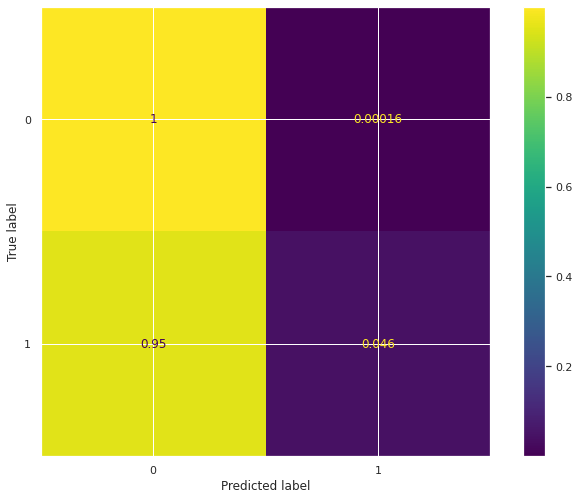

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(knn, X_test, y_test, normalize='true')
print(confusion_matrix(y_test,knn.predict(X_test),normalize='true'))

#Random Forest

In [41]:
rfc = RandomForestClassifier() # class_weight='balanced'
rfc.fit(X_train, y_train.values.ravel())
print("Train Accuracy :", rfc.score(X_train, y_train))
print("Test Accuracy :", rfc.score(X_test, y_test))

Train Accuracy : 1.0
Test Accuracy : 0.9381112246387389


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.9978522  0.0021478 ]
 [0.72590628 0.27409372]]


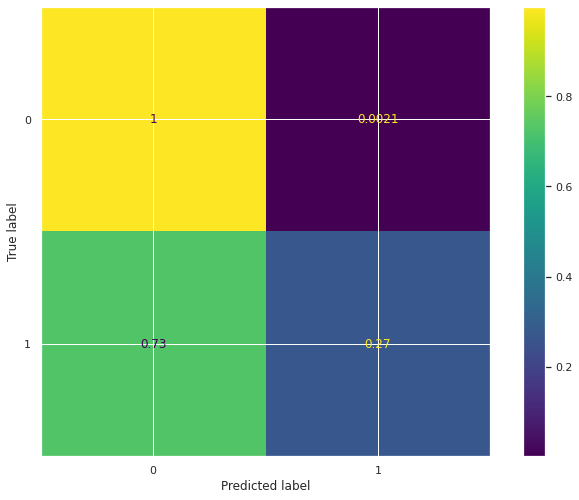

In [42]:
plot_confusion_matrix(rfc, X_test, y_test, normalize='true')
print(confusion_matrix(y_test, rfc.predict(X_test),normalize='true'))
pass

#Нейронная сеть

In [43]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (100, 50), random_state = 42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.01627499635089768, 0.07933148445482412)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.96738525 0.03261475]
 [0.59858532 0.40141468]]


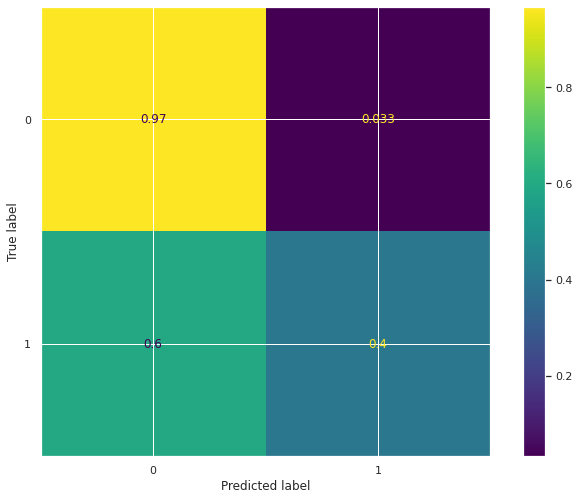

In [44]:
plot_confusion_matrix(model, X_test, y_test, normalize='true')
print(confusion_matrix(y_test, model.predict(X_test),normalize='true'))

#Подбор гиперпараметра

In [55]:
np.linspace(0, 10, 6)

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [56]:
np.logspace(0, 10, 6)

array([1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10])

In [57]:
10**np.linspace(0, 10, 6)

array([1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10])

In [58]:
np.logspace(-4, 5, 10)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05])

In [59]:
alpha_arr = np.logspace(-4, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (100, 50), random_state = 42, alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


График зависимости ошибки от гиперпараметра альфа:

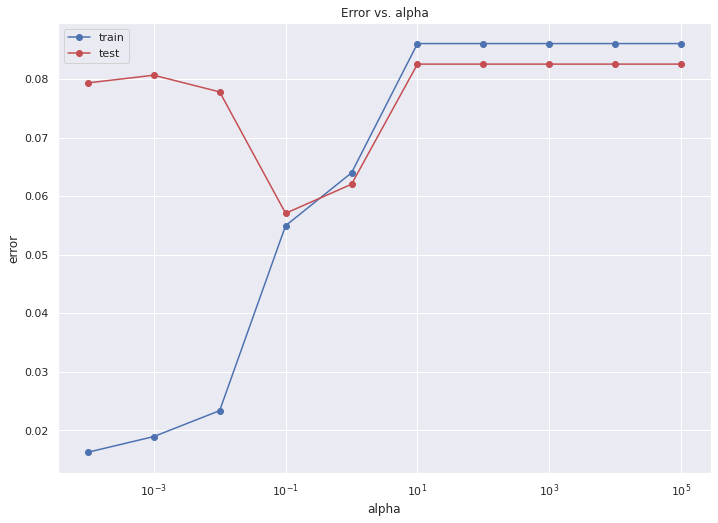

In [60]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
#plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Для тренировочной выборки ошибка возрастает при росте альфа, для тестовой происходит перепад при котором ошибка минимальна при некоторых других значениях альфа

In [61]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.01627499635089768 0.05707196029776675


In [62]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.1]


In [63]:
alpha_opt = alpha_opt[0]

In [64]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,50), random_state = 42, alpha = alpha_opt)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.054955480951685884
0.05707196029776675


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.99681807 0.00318193]
 [0.65605659 0.34394341]]


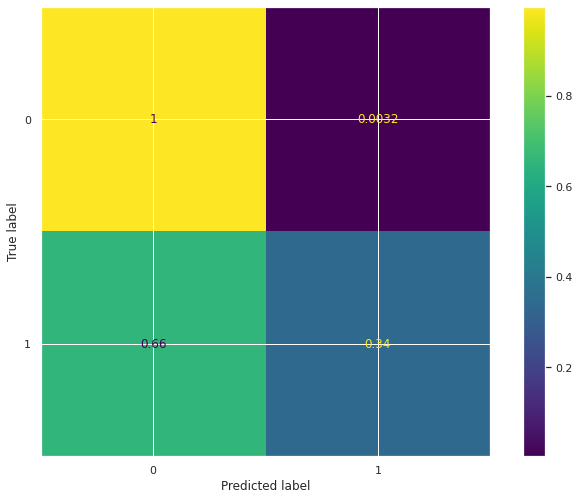

In [65]:
plot_confusion_matrix(mlp_model, X_test, y_test, normalize='true')
print(confusion_matrix(y_test, mlp_model.predict(X_test),normalize='true'))

#Логистическая регрессия

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.06843283218994795, 0.06641366223908918)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[0.99363615 0.00636385]
 [0.73386384 0.26613616]]


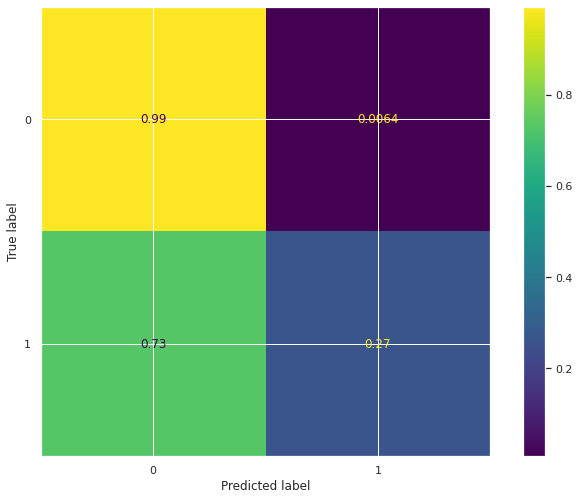

In [63]:
plot_confusion_matrix(model, X_test, y_test, normalize='true')
print(confusion_matrix(y_test, model.predict(X_test),normalize='true'))

#Выводы
Недообучения или переобучения не наблюдается. По значению ошибки лучшим методом является MLP с оптимально подобранным параметром альфа. По confusion matrix можно сделать следующие выводы:
1) Для knn не повышения предсказываются почти со 100% точностью, однако для повышений точность предсказаний довольно низкая.
2) Для Random forest точность предсказания повышений увеличивается в сравнении с knn, при этом точность предсказания не повышений падает.
3) Для MLP достигается максимальная точность предсказания повышений, при том, что в сравнении с Random forest точность предсказания не повышений хоть и уменьшается, но не сильно
4) Для логистической регрессии эти результаты близки к показателям Random forest.